### Visualization from lecture to get an overview

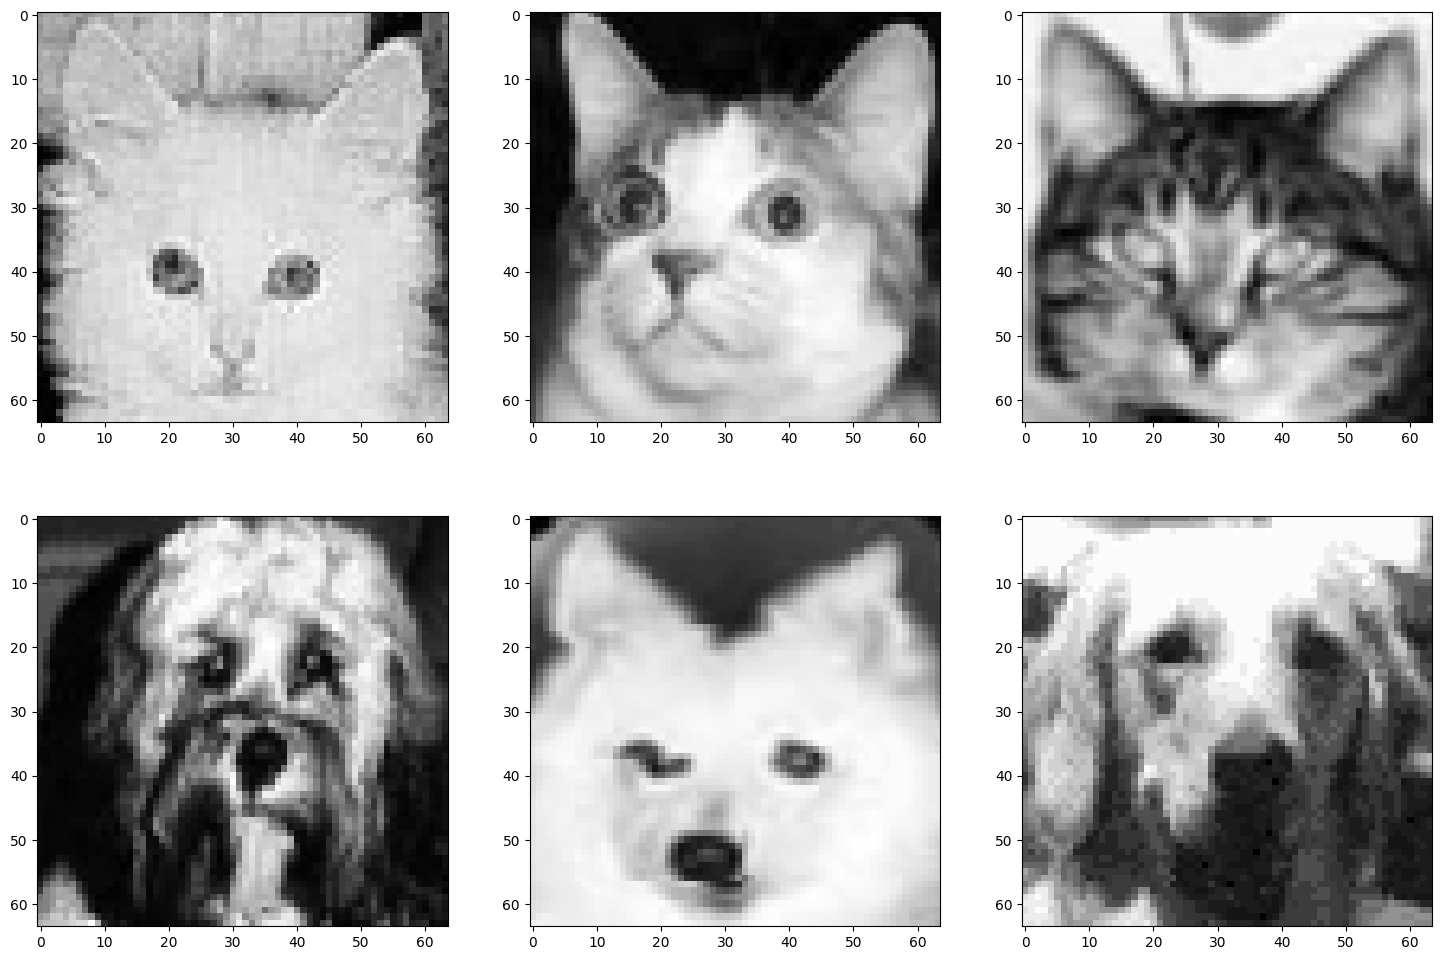

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

CATSnDOGS = np.array(pd.read_csv("CATSnDOGS.csv"))
Labels = np.array(pd.read_csv("Labels.csv"))


def rotateM(x):
    return np.transpose(np.apply_along_axis(np.flip, 0, x))

np.random.seed(1000012)
ssc = np.random.choice(np.where(Labels == 0)[0], 3, replace=False)
ssd = np.random.choice(np.where(Labels == 1)[0], 3, replace=False)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

for i in range(3):
    axes[0][i].imshow(rotateM(np.reshape(CATSnDOGS[ssc[i], :], (64, 64))), cmap='gray')
    axes[0][i].set_xlabel("")
    axes[0][i].set_ylabel("")
    
for i in range(3):
    axes[1][i].imshow(rotateM(np.reshape(CATSnDOGS[ssd[i], :], (64, 64))), cmap='gray')
    axes[1][i].set_xlabel("")
    axes[1][i].set_ylabel("")

plt.show()

In [48]:
def get_misclassified_indices(clf, features, labels, dataset):
    # Make predictions on the input data
    y_pred = clf.predict(features)
    
    # Find misclassified samples
    misclassified_idx = [i for i in range(len(labels)) if labels[i] != y_pred[i]]
    misclassified = features[misclassified_idx]
    
    # Find indices of misclassified samples in the original dataset
    indices = []
    for i in range(misclassified.shape[0]):
        image = misclassified[i,:]
        idx = np.where((dataset==image).all(axis=1))[0][0]
        indices.append(idx)
    
    return indices

In [4]:
lr_list = []
svm_list = []
rf_list = []
mlp_list = []
iterations = 100

for i in range(iterations):
    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(CATSnDOGS, Labels.ravel(), test_size=0.2)


    #pipe lines for standardization
    lr = make_pipeline(
        StandardScaler(),
        LogisticRegression(max_iter=1000)
    )


    svm = make_pipeline(
        StandardScaler(),
        SVC()
    )

    rf = make_pipeline(
        StandardScaler(),
        RandomForestClassifier()
    )

    mlp = make_pipeline(
        StandardScaler(),
        MLPClassifier(hidden_layer_sizes=(100,))
    )

    # Train the classifiers using the pipeline
    lr.fit(train_features, train_labels)
    svm.fit(train_features, train_labels)
    rf.fit(train_features, train_labels)
    mlp.fit(train_features, train_labels)

    # Make predictions on the testing data and calculate the accuracies
    lr_pred = lr.predict(test_features)
    lr_acc = accuracy_score(test_labels, lr_pred)

    svm_pred = svm.predict(test_features)
    svm_acc = accuracy_score(test_labels, svm_pred)

    rf_pred = rf.predict(test_features)
    rf_acc = accuracy_score(test_labels, rf_pred)

    mlp_pred = mlp.predict(test_features)
    mlp_acc = accuracy_score(test_labels, mlp_pred)

    
    lr_list.append(lr_acc)
    svm_list.append(svm_acc)
    rf_list.append(rf_acc)
    mlp_list.append(mlp_acc)
    
    
# Print the test accuracies
print("Logistic Regression Accuracy:", np.mean(lr_list))
print("Support Vector Machine Accuracy:", np.mean(svm_list))
print("Random Forest Accuracy:", np.mean(rf_list))
print("MLP Accuracy:", np.mean(np.mean(mlp_list)))

Logistic Regression Accuracy: 0.7527499999999999
Support Vector Machine Accuracy: 0.8022499999999999
Random Forest Accuracy: 0.7502500000000001
MLP Accuracy: 0.7855


### Reflection
Based on the results of the classifiers tested, it appears that the cats and dogs are relatively well separated, with classification accuracies ranging from 75% to 80%. This suggests that there is some overlap between the two categories, but the classifiers are still able to distinguish between them with a relatively high degree of accuracy. It's worth noting that the accuracy of the classifiers may vary depending on the specific features used and the training/test splits used, so these results should be interpreted with some caution. Additionally, it may be useful to explore other metrics beyond accuracy, such as precision, recall, and F1-score, in order to get a more comprehensive picture of the performance of the classifiers.

In [ ]:
from collections import Counter

all_indices = []
iterations = 20
for i in range(iterations):
    
    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(CATSnDOGS, Labels.ravel(), test_size=0.2)


    #pipe lines for standardization
    lr = make_pipeline(
        StandardScaler(),
        LogisticRegression(max_iter=1000)
    )


    svm = make_pipeline(
        StandardScaler(),
        SVC()
    )

    rf = make_pipeline(
        StandardScaler(),
        RandomForestClassifier()
    )

    mlp = make_pipeline(
        StandardScaler(),
        MLPClassifier(hidden_layer_sizes=(100,))
    )

    # Train the classifiers using the pipeline
    lr.fit(train_features, train_labels)
    svm.fit(train_features, train_labels)
    rf.fit(train_features, train_labels)
    mlp.fit(train_features, train_labels)

    # Make predictions on the testing data
    lr_pred = lr.predict(test_features)
    svm_pred = svm.predict(test_features)
    rf_pred = rf.predict(test_features)
    mlp_pred = mlp.predict(test_features)

    # Get misclassified indices for each classifier
    lr_indices = get_misclassified_indices(lr, test_features, test_labels, CATSnDOGS)
    svm_indices = get_misclassified_indices(svm, test_features, test_labels, CATSnDOGS)
    rf_indices = get_misclassified_indices(rf, test_features, test_labels, CATSnDOGS)
    mlp_indices = get_misclassified_indices(mlp, test_features, test_labels, CATSnDOGS)

    indices = lr_indices + svm_indices + rf_indices + mlp_indices
    all_indices = all_indices + indices
    
counts = Counter(all_indices)
most_common = [k for k, v in counts.most_common()]
plt.imshow(rotateM(np.reshape(CATSnDOGS[most_common[0],:], (64, 64))), cmap='gray')